# Tareas

<div class="alert alert-warning">
Fecha límite de entrega: 9 de octubre, 2020 23:59
</div>

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed, widgets

Populating the interactive namespace from numpy and matplotlib


In [2]:
class RegresionLineal:
    def __init__(self, alpha=0.3, max_iters=100, tols=0.001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m    

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

In [3]:
from sympy import *

In [4]:
B0= Symbol('B0')


## Problema 2

Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal. ) :

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [5]:
%cat Clases/chirps.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


In [6]:
archivo=open('chirps.txt')
cricris=[]
temp=[]
#Leemos el archivo con todo y títulos
for linea in archivo:
    a=linea.split('\t')
    cricris.append((a[0])) 
    temp.append((a[1]))
#Quitamos los titulos
temp=temp[1:]   
cricris=cricris[1:]
#Convertimos en float cada entrada
for i in range(len(cricris)):
    cricris[i]=float(cricris[i])
    temp[i]=float(temp[i])
#Convertimos las lista en arreglos
X=np.array(cricris)
Y=np.array(temp)


Text(0.5, 0, 'Cris por segundo')

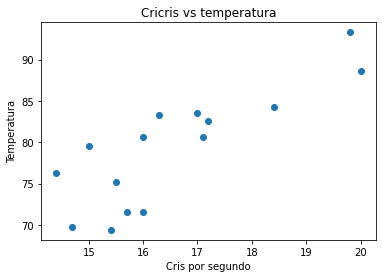

In [7]:
plt.scatter(X,Y, label="data")
plt.title('Cricris vs temperatura')
plt.ylabel('Temperatura')
plt.xlabel('Cris por segundo')

In [8]:
#Aplicamos la regresión lineal
#Escogemos una alpha bastante pequeño 
r = RegresionLineal(alpha=0.001, max_iters=10000000, tols=0.00000001)
r.gradientDescent(X, Y)

La función convergió con beta: [22.52829597  3.42948978] en la iteración 432138


In [9]:
def plotModelo(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_title('Cricris vs Temperatura')
    ax[0].set_ylabel('Temperatura (°F)')
    ax[0].set_xlabel('Cricris por segundo')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

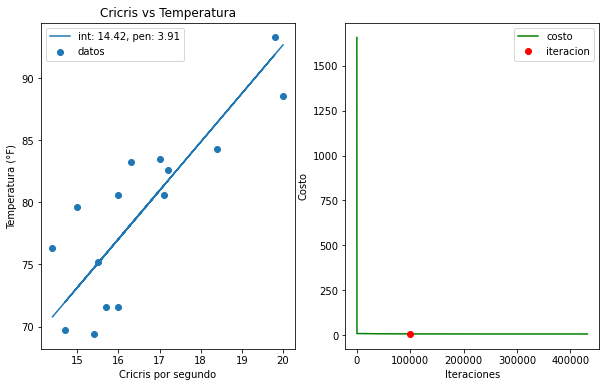

In [10]:
plotModelo(X,Y, r, 100000)

In [11]:
ultima_iteracion = (r.breaking_iteration - 1) if r.breaking_iteration else (r.max_iters - 1)

interact(plotModelo, x=fixed(X), y=fixed(Y), rl=fixed(r), iteracion=(0,ultima_iteracion,1));

interactive(children=(IntSlider(value=216068, description='iteracion', max=432137), Output()), _dom_classes=('…

Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?

### Respuesta:
#### Llegué a un alpha=0.001 con prueba y error y buscando que 10^-4 es una buena alpha para avanzar y tener buena precisión. Si el alpha era más grande la función podía no converger y se entraría en un loop en el que no se converge. 
#### Los datos no coinciden por completo con los motrados en la página web pero son bastantes cercanos.


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

In [12]:
C1x=np.array([10,8,13,9,11,14,6,4,12,7,5])
C1y=np.array([8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68])
C2x=np.array([10,8,13,9,11,14,6,4,12,7,5])
C2y=np.array([9.14,8.14,8.74,8.77,9.26,8.1,6.13,3.1,9.13,7.26,4.74])
C3x=np.array([10,8,13,9,11,14,6,4,12,7,5])
C3y=np.array([7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73])
C4x=np.array([8,8,8,8,8,8,8,19,8,8,8])
C4y=np.array([6.58,5.76,7.71,8.84,8.47,7.08,5.25,12.5,5.56,7.91,6.89])

def plotModelo(x,y,rl,iteracion,a):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].set_title(a)
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_ylabel('Y')
    ax[0].set_xlabel('X')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

La función convergió con beta: [0.09213854 0.77768274] en la iteración 4724


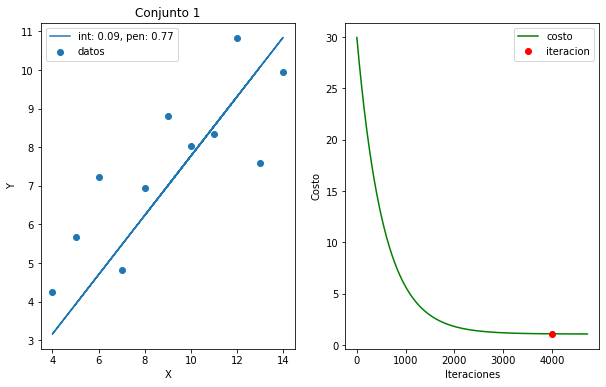

In [13]:
#Cuarteto 1
r = RegresionLineal(alpha=0.00001, max_iters=10000000, tols=0.00001)
r.gradientDescent(C1x, C1y)
plotModelo(C1x,C1y, r, 4000,'Conjunto 1')

La función convergió con beta: [0.09214178 0.77767265] en la iteración 4724


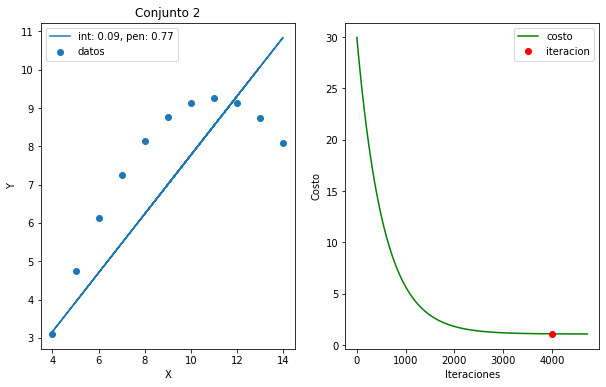

In [14]:
#Cuarteto 2
r = RegresionLineal(alpha=0.00001, max_iters=10000000, tols=0.00001)
r.gradientDescent(C2x, C2y)
plotModelo(C2x,C2y, r, 4000,'Conjunto 2')

La función convergió con beta: [0.09213408 0.77754575] en la iteración 4723


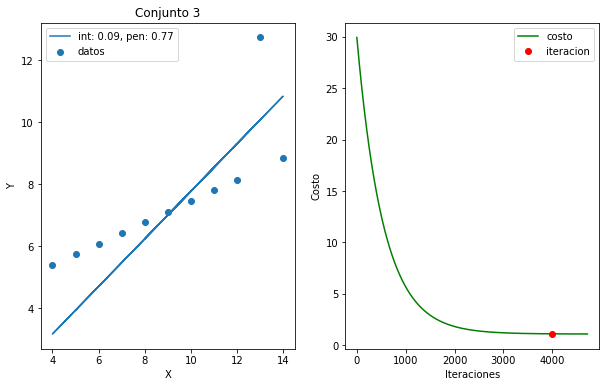

In [15]:
#Cuarteto 3
r = RegresionLineal(alpha=0.00001, max_iters=10000000, tols=0.00001)
r.gradientDescent(C3x, C3y)
plotModelo(C3x,C3y, r, 4000,'Conjunto 3')

La función convergió con beta: [0.09221132 0.77797234] en la iteración 4724


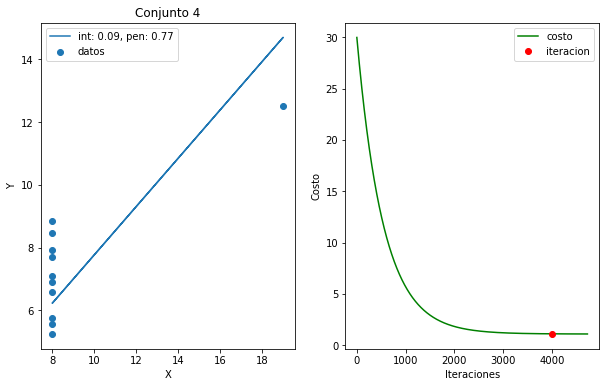

In [16]:
#Cuarteto 4
r = RegresionLineal(alpha=0.00001, max_iters=10000000, tols=0.00001)
r.gradientDescent(C4x, C4y)
plotModelo(C4x,C4y, r, 4000,'Conjunto 4')

Lo que sucede con estos conjuntos de datos es que todos regresan practicamente la misma regresión lineal.

## Problema 5

Use el archivo `radioactive_decay.dat`

In [17]:
%cat radioactive_decay.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


**(a)** Grafique los datos ¿Qué forma tienen?

Text(0.5, 0, 'Tiempo')

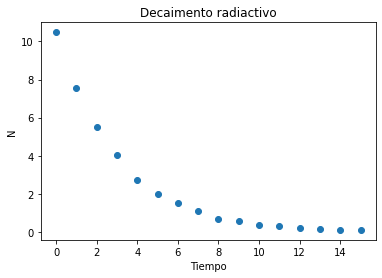

In [18]:
archivo=open('radioactive_decay.txt')
tiempo=[]
n=[]
#Leeemos la primera linea y la ignoramos
archivo.readline()
#Leeemos el resto de los datos
for linea in archivo:
    a=linea.split('\t')
    tiempo.append((a[0])) 
    n.append((a[1]))

#Convertimos en float cada entrada
for i in range(len(n)):
    tiempo[i]=float(tiempo[i])
    n[i]=float(n[i])
#Convertimos las lista en arreglos
X=np.array(tiempo)
Y=np.array(n)

plt.scatter(X,Y, label="data")
plt.title('Decaimento radiactivo')
plt.ylabel('N')
plt.xlabel('Tiempo')

El conjunto de datos tiene forma de la función 10/e^x

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

In [19]:
#Podría obtenerse el inverso de los valores de n, pues el decaimiento se puede obtner como n=1/y => y=1/n
MY=1/Y
arreglo=np.zeros((2,len(X)))
arreglo[0]=X
arreglo[1]=MY
np.savetxt('transform_radioactive_decay.txt',arreglo)

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

In [20]:
arr=np.loadtxt('transform_radioactive_decay.txt')
x=arr[0]
y=arr[1]
r = RegresionLineal(alpha=0.00001, max_iters=10000000, tols=0.000001)
r.gradientDescent(x, y)
#plotModelo(x,y, r, 200000,'Deacaimiento Radioactivo Tansformado')
a='Deacaimiento Radioactivo Tansformado'
ultima_iteracion = (r.breaking_iteration - 1) if r.breaking_iteration else (r.max_iters - 1)

interact(plotModelo, x=fixed(x), y=fixed(y), rl=fixed(r), iteracion=(0,ultima_iteracion,1), a=fixed(a));

La función convergió con beta: [-0.52205318  0.45298646] en la iteración 145306


interactive(children=(IntSlider(value=72652, description='iteracion', max=145305), Output()), _dom_classes=('w…

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.

In [21]:
r.gradientDescent(x, y)

La función convergió con beta: [-0.52205318  0.45298646] en la iteración 145306


El espacio que se mantiene sin transformar es el eje de las x que representa el tiempo, pues tanto 'n' como 'y' dependen del tiempo.